Typically, we calculate the IQR proximity rule boundaries by multiplying the IQR by 1.5. However, it is also common practice to find extreme values by multiplying the IQR by 3.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
784,6.19,19.0,0
300,7.36,52.0,1
220,7.75,16.0,1
68,6.58,30.0,0
121,5.91,27.0,0


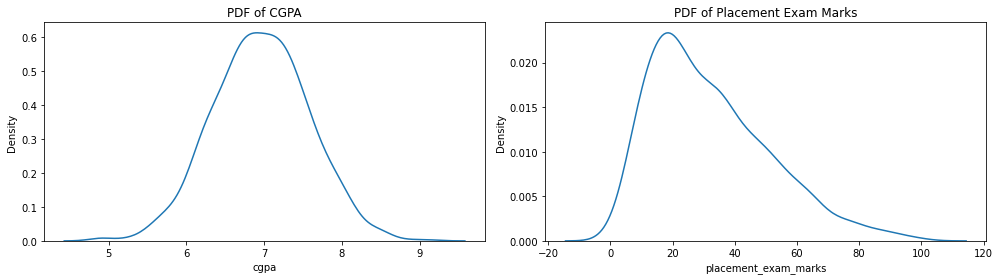

In [5]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['cgpa'])
plt.title('PDF of CGPA')

plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])
plt.title('PDF of Placement Exam Marks')


plt.tight_layout()
plt.show()

In [6]:
"""
"Negative values" for the skewness indicate data that are skewed "left" and 
"positive values" for the skewness indicate data that are skewed "right".
"""
df['placement_exam_marks'].skew()

0.8356419499466834

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

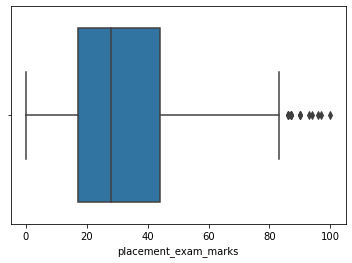

In [12]:
"""
You will see some outliers in the boxplot for this feature.
"""
sns.boxplot(x = df['placement_exam_marks'])

In [14]:
"""
First of all, Find Inter Quantile Range (IQR).
"""

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [17]:
#percentile25
#percentile75

In [19]:
iqr = percentile75 - percentile25
iqr

27.0

In [53]:
maximum = percentile75 + (1.5 * iqr)
minimum = percentile25 - (1.5 * iqr)

In [54]:
print("Upper limit",maximum)
print("Lower limit",minimum)

Upper limit 84.5
Lower limit -23.5


### Detecting Outliers

In [55]:
df[df['placement_exam_marks'] > maximum]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [56]:
"""
Because the minimum value of placement_exam_marks feature is zero, while the lower limit is -23.5. So, it's obvious
that there will be no outliers at this end.
"""
df[df['placement_exam_marks'] < minimum]

,cgpa,placement_exam_marks,placed


### <b style = "color:red">Trimming</b>

In [57]:
new_df = df[(df['placement_exam_marks'] <= maximum) & (df['placement_exam_marks'] >= minimum)]
new_df.shape

(985, 3)

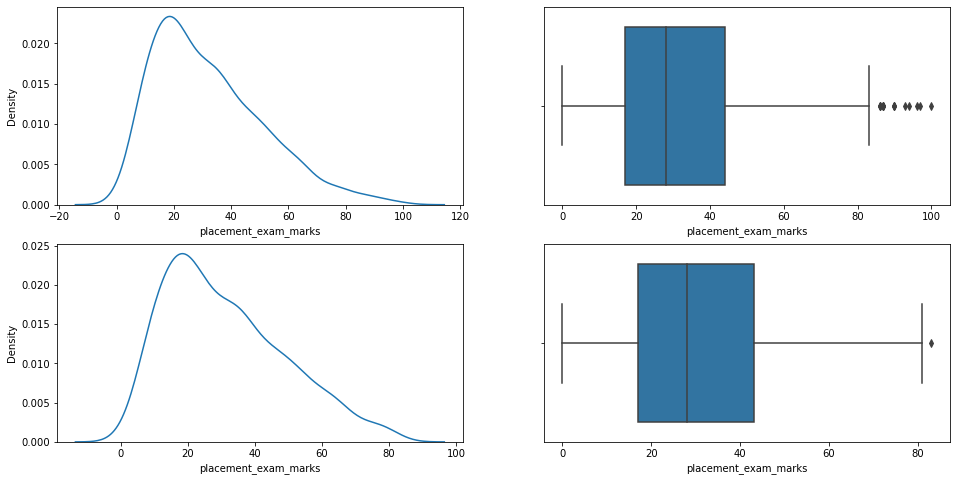

In [58]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x = new_df['placement_exam_marks'])

plt.show()

### <b style = "color:red">Capping</b>

In [60]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > maximum,
    maximum,
    np.where(
        new_df_cap['placement_exam_marks'] < minimum,
        minimum,
        new_df_cap['placement_exam_marks']
    )
)

In [61]:
new_df_cap.shape

(1000, 3)

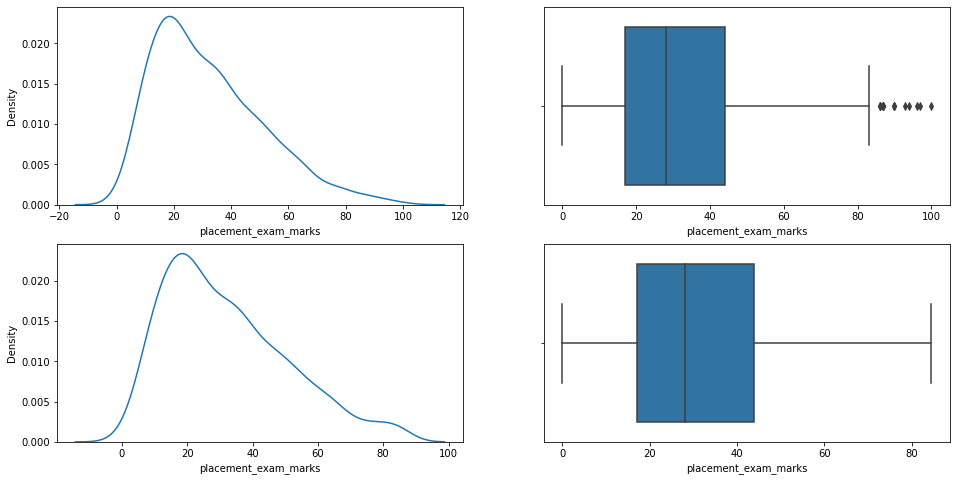

In [62]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x = new_df_cap['placement_exam_marks'])

plt.show()